### FP数据分析（2020-12-21）

通过github API获取UCE FP数据（json格式），保存为txt文件。

In [ ]:
import requests
import json


if __name__ == "__main__":
    all_json_data = []
    cnt = 1    
    while True:
        rst = requests.get("https://api.github.com/repos/UCE-group/fortnightly-plan/issues?page=" + str(cnt))
        json_data = json.loads(rst.text)
        print(cnt, " : ", len(json_data))
        cnt += 1
        if (len(json_data) == 0):
            break
        all_json_data.extend(json_data)
        #break
    with open("save_plan_data.txt", "w") as f:
        line = json.dumps(all_json_data, ensure_ascii=False)
        f.write(line)

读取数据

In [2]:
all_fp_lines = []
with open("save_plan_data.txt", "r") as f:
    temp = f.readlines()
    all_fp_lines = json.loads(temp[0])

In [3]:
import re

names = [re.split('[- 0]', line['title'].strip())[-1] for line in all_fp_lines]
contents = [line['body'] for line in all_fp_lines]
create_times = [line['created_at'] for line in all_fp_lines]

查看日期样式

In [4]:
create_times[0]

'2020-11-16T15:57:09Z'

UTC时间转北京时间

In [5]:
import pandas as pd

create_times = [str(pd.to_datetime(line).tz_convert("Asia/Shanghai")) for line in create_times]
create_times[0]

'2020-11-16 23:57:09+08:00'

FP的总条数

In [6]:
len(all_fp_lines)

389

数据抽样

In [8]:
import random

sample = random.randint(0, len(all_fp_lines))

all_fp_lines[sample]

{'url': 'https://api.github.com/repos/UCE-group/fortnightly-plan/issues/313',
 'repository_url': 'https://api.github.com/repos/UCE-group/fortnightly-plan',
 'labels_url': 'https://api.github.com/repos/UCE-group/fortnightly-plan/issues/313/labels{/name}',
 'comments_url': 'https://api.github.com/repos/UCE-group/fortnightly-plan/issues/313/comments',
 'events_url': 'https://api.github.com/repos/UCE-group/fortnightly-plan/issues/313/events',
 'html_url': 'https://github.com/UCE-group/fortnightly-plan/issues/313',
 'id': 527713692,
 'node_id': 'MDU6SXNzdWU1Mjc3MTM2OTI=',
 'number': 313,
 'title': '【WP】2019年秋季-第十三周-马瑞灏',
 'user': {'login': 'MRH-010208',
  'id': 57336937,
  'node_id': 'MDQ6VXNlcjU3MzM2OTM3',
  'avatar_url': 'https://avatars3.githubusercontent.com/u/57336937?v=4',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/MRH-010208',
  'html_url': 'https://github.com/MRH-010208',
  'followers_url': 'https://api.github.com/users/MRH-010208/followers',
  'following_url': 'htt

提交FP的总人数

In [9]:
def count_num(lst):
    dic = {}
    for name in lst:
        if name not in dic:
            dic[name] = 0
        dic[name] += 1
    return dic

In [10]:
len(count_num(names))

78

提交FP数量top20的同学

In [11]:
sorted(count_num(names).items(), key=lambda d:d[1], reverse=True)[:20]

[('王彦强', 20),
 ('苏嘉锐', 20),
 ('杨磊', 18),
 ('张巨梩', 17),
 ('贾丽菁', 16),
 ('叶根生', 13),
 ('李昊', 11),
 ('林志成', 11),
 ('彭翼', 11),
 ('陈金波', 9),
 ('姜晨', 9),
 ('张振尧', 9),
 ('栾皓', 9),
 ('张辰', 8),
 ('彭伟豪', 8),
 ('苏一玮', 8),
 ('宋俊霖', 7),
 ('金鼎松', 7),
 ('刘洋', 7),
 ('王润泽', 6)]

年份分布

In [13]:
years = [line.split('-')[0] for line in create_times]
year_dic = count_num(years)
year_dic

{'2020': 33, '2019': 193, '2018': 72, '2017': 91}

结论：2019年参与度最高，2020年因疫情影响半年未开学，参与度有明显下滑

月份分布

In [14]:
month = [line.split('-')[1] for line in create_times]
month_dic = count_num(month)
month_lst = sorted(month_dic.items(), key=lambda d:d[0], reverse=False)

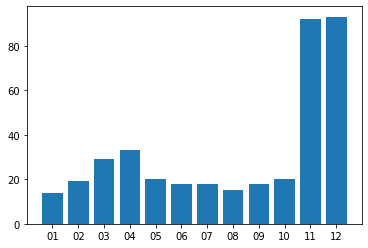

In [15]:
import matplotlib.pyplot as plt
 
index, height = zip(*month_lst)
plt.bar(index, height)
plt.show()

结论：开学初参与度逐渐上升，之后下滑，假期参与度最低

星期分布

In [16]:
import pandas as pd

week_name = ['星期'+num for num in ['一', '二', '三', '四', '五', '六', '日']]

week_dic = count_num([pd.to_datetime(date).weekday() for date in create_times])
week_lst = sorted(week_dic.items(), key=lambda d:d[0], reverse=False)

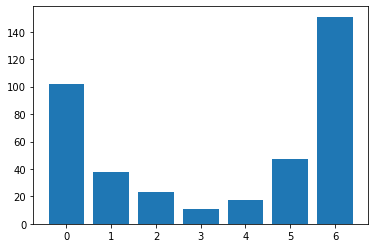

In [17]:
import matplotlib.pyplot as plt

index, height = zip(*week_lst)
plt.bar(index, height)
plt.show()

In [18]:
[(week_name[pair[0]], pair[1]) for pair in week_lst]

[('星期一', 102),
 ('星期二', 38),
 ('星期三', 23),
 ('星期四', 11),
 ('星期五', 17),
 ('星期六', 47),
 ('星期日', 151)]

结论：周末提交数量最多，周一次之，周中较少

时间分布

In [21]:
time_dic = count_num([re.split('[: ]', time)[1] for time in create_times])
time_lst = sorted(time_dic.items(), key=lambda d:d[0], reverse=False)

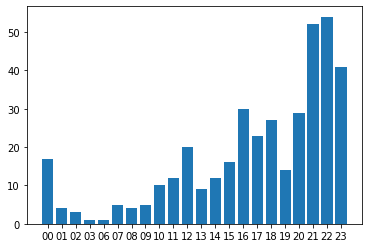

In [22]:
index, height = zip(*time_lst)
plt.bar(index, height)
plt.show()

结论：晚上提交最多，早上最少

词云绘制

In [28]:
# 字体文件下载
!curl -O http://labfile.oss.aliyuncs.com/courses/756/DroidSansFallbackFull.ttf

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4422k  100 4422k    0     0  4449k      0 --:--:-- --:--:-- --:--:-- 4445k


In [47]:
# 停用词表下载
!git clone https://github.com/goto456/stopwords

Cloning into 'stopwords'...
remote: Enumerating objects: 22, done.
remote: Total 22 (delta 0), reused 0 (delta 0), pack-reused 22
Unpacking objects: 100% (22/22), done.


In [56]:
stop_words = []
with open("stopwords/baidu_stopwords.txt", "r") as f1, \
     open("stopwords/cn_stopwords.txt", "r") as f2, \
     open("stopwords/hit_stopwords.txt", "r") as f3, \
     open("stopwords/scu_stopwords.txt", "r") as f4:
    stop_words.extend(f1.readlines())
    stop_words.extend(f2.readlines())
    stop_words.extend(f3.readlines())
    stop_words.extend(f4.readlines())

stop_words = [word.strip() for word in stop_words]

In [57]:
import jieba

text_result = []

for line in contents:
    text_result.extend(list(jieba.cut(line)))
    
text_result = [line for line in text_result if line not in stop_words]

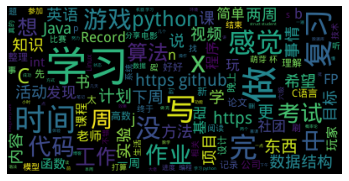

In [61]:
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font="DroidSansFallbackFull.ttf"
wordcloud = WordCloud(font_path=font, max_font_size=50).generate(",".join(text_result))
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()